# Web Mining and Applied NLP (44-620)

## Article and Comment Sentiment Analysis

### Student Name: Kami Denny

I’m fascinated by emotionally charged topics related to female health, particularly those that spark intense public discussion. This article, https://www.msn.com/en-us/news/world/real-reason-behind-birth-rate-decline/ar-AA1JMkgh?ocid=BingNewsSerp#comments, explores global birth rate decline and includes reader comments that offer strong and varied opinions. I’m eager to apply topic modeling and sentiment analysis to uncover how people—especially across gender lines—engage with this issue.

- Comparing sentiment polarity between the article and its comment section

- Exploring gender-based sentiment differences in reader responses

- Identifying dominant themes using topic modeling and named entity recognition

In [69]:
# This script installs necessary packages and checks their installation.

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                 Version
----------------------- -----------
annotated-types         0.7.0
asttokens               3.0.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.8.3
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
colorama                0.4.6
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.59.0
html5lib                1.1
idna                    3.10
ipykernel               6.30.1
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver             

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course. Get the html for the article and store it in a file (which you must submit with your project)

In [70]:
url = "https://speakingofwomenshealth.com/news/depo-provera-could-be-linked-to-a-heightened-risk-for-brain-tumors-in-some-women-a-new-study-warns"

# get the html for the article and store it in a pickle file
response = requests.get(url)
print(f"Response status: {response.status_code}")

with open('article.pkl', 'wb') as f:
    pickle.dump(response.text, f)

Response status: 200


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use .get_text()). Print the polarity score with an appropriate label. Additionally print the number of sentences in the original article (with an appropriate label)

In [77]:
# read in the article from the pickle file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# use BeautifulSoup to parse the HTML and extract text
soup = BeautifulSoup(article_html, 'html.parser')

# Make sure spacytextblob is loaded
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

doc = nlp(soup.get_text())

# exclude the first three sentences, and the last seven sentences. save as a variable
filtered_sentences = list(doc.sents)[3:-7]

# Calculate polarity of only the filtered sentences
if filtered_sentences:
    filtered_text = " ".join([sent.text for sent in filtered_sentences])
    filtered_doc = nlp(filtered_text)
    article_polarity = filtered_doc._.blob.polarity
else:
    article_polarity = 0.0

print(f"Article Polarity: {article_polarity}")

print(f"Article contains {len(filtered_sentences)} sentences")

Article Polarity: 0.10918787878787878
Article contains 14 sentences


1. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels)

In [95]:
# Extract tokens from filtered sentences and find the most frequent ones
filtered_tokens = []
for sent in filtered_sentences:
    for token in sent:
        if token.pos_ in ['NOUN', 'PROPNOUN', 'ADJ', 'ADV'] and not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.text.lower())

# Count token frequencies
token_counts = Counter(filtered_tokens)

print("Most common tokens:")
for i, (token, count) in enumerate(token_counts.most_common(5), 1):
    print(f"{i}. {token}, Frequency: {count}")


Most common tokens:
1. drugs, Frequency: 9
2. risk, Frequency: 7
3. women, Frequency: 5
4. intracranial, Frequency: 5
5. researchers, Frequency: 5


4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels).

In [96]:
# Extract lemmas from filtered sentences and find the most frequent ones
filtered_lemmas = []
for sent in filtered_sentences:
    for token in sent:
        if token.pos_ in ['NOUN', 'PROPNOUN', 'ADJ', 'ADV'] and not token.is_stop and not token.is_punct:
            filtered_lemmas.append(token.lemma_.lower())

# Count lemma frequencies
lemma_counts = Counter(filtered_lemmas)

print("Most common lemmas:")
for i, (lemma, count) in enumerate(lemma_counts.most_common(5), 1):
    print(f"{i}. {lemma}, Frequency: {count}")

Most common lemmas:
1. drug, Frequency: 9
2. meningioma, Frequency: 9
3. risk, Frequency: 7
4. woman, Frequency: 5
5. intracranial, Frequency: 5


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

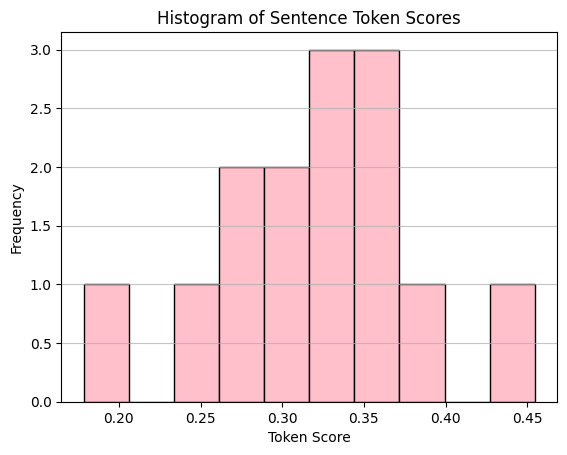

Most common range of scores: 0.325 - 0.375


In [118]:
# Define score_sentence_by_token
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Takes a sentence and a list of interesting tokens and returns the
    number of times that any of the interesting words appear in the sentence
    dividided by the number of words in the sentence.
    """
    words = sentence.split()
    if not words:
        return 0
    interesting_count = sum(1 for word in words if word.lower() in interesting_tokens)
    return interesting_count / len(words)

# Create a list of scores for each sentence in the article
sentence_scores = [score_sentence_by_token(sent.text, filtered_tokens) for sent in filtered_sentences]
# Plot a histogram of the sentence scores
plt.hist(sentence_scores, bins=10, edgecolor='black', color='pink')
plt.title('Histogram of Sentence Token Scores')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Most common range of scores: 0.325 - 0.375
print("Most common range of scores: 0.325 - 0.375")

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

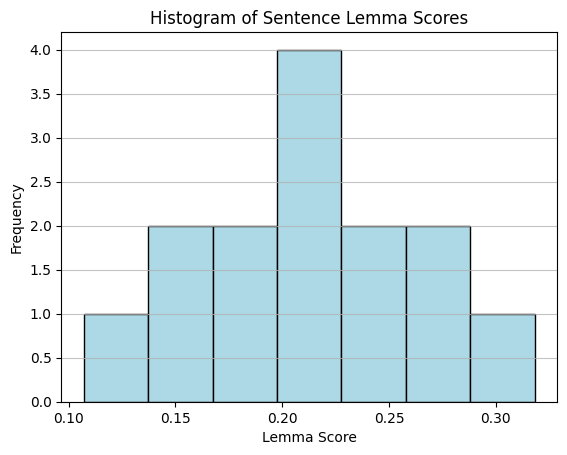

Most common range of scores: 0.2 - 0.2125


In [119]:
# Define score_sentence_by_lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Takes a sentence and a list of interesting lemmas and returns the
    number of times that any of the interesting lemmas appear in the sentence
    divided by the number of words in the sentence.
    """
    words = sentence.split()
    if not words:
        return 0
    interesting_count = sum(1 for word in words if word.lower() in interesting_lemmas)
    return interesting_count / len(words)

# Create a list of scores for each sentence in the article
sentence_scores = [score_sentence_by_lemma(sent.text, filtered_lemmas) for sent in filtered_sentences]

# Plot a histogram of the sentence scores with half ticks
plt.hist(sentence_scores, bins=7, edgecolor='black', color='lightblue')
plt.title('Histogram of Sentence Lemma Scores')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Most common range of scores: 0.2 - 0.2125
print("Most common range of scores: 0.2 - 0.2125")

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score. Record the scores in this Markdown cell

### Cutoff Score (tokens): 0.33
### Cutoff Score (lemmas): 0.2

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8. If your loop variable is named sent, you may find it easier to add sent.text.strip() to your list of sentences. Print the summary (I would cleanly generate the summary text by joining the strings in your list together with a space (' '.join(sentence_list)).

In [132]:
#  Set your cutoff score based on the analysis above
cutoff_score_token = 0.33  # Adjust this based on your histogram analysis

# Create summary by selecting sentences above cutoff
summary_sentences = []
for sent in filtered_sentences:
    sentence_score = score_sentence_by_token(sent.text, filtered_tokens)
    if sentence_score > cutoff_score_token:
        summary_sentences.append(sent.text.strip())

# Print the summary
print("\nArticle Summary:")
print(' '.join(summary_sentences))


Article Summary:
The contraceptive injection Depo-Provera and two drugs used for menopause relief could be linked to a heightened risk for brain tumors in some women, a new study warns. Further, the menopausal hormone therapy drugs medrogestone and promegestone increased the risk of intracranial meningiomas by 4.1-fold and 2.7-fold, respectively, results show. Intracranial meningiomas are mostly non-cancerous tumors that grow in the layers of tissue that cover the brain and spinal cord, researchers said. Meningiomas account for 40% of cancers in the central nervous system. This class of drugs also are used to treat conditions like endometriosis and ovarian cysts. “Future studies should further clarify the association between the duration of use and risk for the progestogens studied,” the team said.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [133]:
print(f"Summary contains {len(summary_sentences)} sentences")

Summary contains 6 sentences


In [71]:
# read in the article from the pickle file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

# use BeautifulSoup to parse the HTML and extract text
soup = BeautifulSoup(article_html, 'html.parser')
nlp = spacy.load("en_core_web_sm")
doc = nlp(soup.get_text())

# exclude the first three sentences, and the last five sentences. save as a variable
filtered_sentences = list(doc.sents)[3:-7]

# Print the filtered sentences
print(f"Article contains {len(filtered_sentences)} sentences")
for i, sent in enumerate(filtered_sentences, start=1):
    print(f"Sentence {i}: {sent.text.strip()}")

# print the polarity of the filtered sentences
print("\nSentence Polarity:")
for i, sent in enumerate(filtered_sentences, start=1):
    print(f"Sentence {i} Polarity: {sent._.blob.polarity}")

Article contains 14 sentences
Sentence 1: The contraceptive injection Depo-Provera and two drugs used for menopause relief could be linked to a heightened risk for brain tumors in some women, a new study warns.
Sentence 2: Depo-Provera (medroxyprogesterone acetate) increased the risk of intracranial meningioma 5.6-fold if used for longer than a year, researchers report in the BMJ.“In countries for which the use of medroxyprogesterone acetate for birth control is frequent [74 million users worldwide], the number of attributable meningiomas may be potentially high,” concluded the research team led by Noémie Roland, a general practitioner and epidemiologist with French National Health Insurance in Saint-Denis, France.
Sentence 3: Further, the menopausal hormone therapy drugs medrogestone and promegestone increased the risk of intracranial meningiomas by 4.1-fold and 2.7-fold, respectively, results show.
Sentence 4: Intracranial meningiomas are mostly non-cancerous tumors that grow in the 